# Chapter 06 학습 관련 기술들

## 6.1 매개변수 갱신
P.189

### 6.1.1 모험가 이야기

### 6.1.2 확률적 경사 하강법(SGD)

$$W \leftarrow W - \eta \frac{\partial L}{\partial W}$$

In [2]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):  # params와 grads는 딕셔너리 변수
        for key in params.keys():
            params[key] -= self.lr * grads[key]

In [2]:
# 딕셔너리 복습
dict = {}
dict['A'] = [1,2,3,4]
dict['B'] = [5,6,7,8]
print(dict)

{'A': [1, 2, 3, 4], 'B': [5, 6, 7, 8]}


In [3]:
dict['A'].append(10)
dict

{'A': [1, 2, 3, 4, 10], 'B': [5, 6, 7, 8]}

In [4]:
dict.keys()

dict_keys(['A', 'B'])

In [5]:
dict.items()

dict_items([('A', [1, 2, 3, 4, 10]), ('B', [5, 6, 7, 8])])

### 6.1.3 SGD의 단점

<img src='./img/fig 6-1.png' width=500>

<img src='./img/fig 6-2.png' width=400>

<img src='./img/fig 6-3.png' width=400>

### 6.1.4 모멘텀

$$v \leftarrow \alpha v - \eta \frac{\partial L}{\partial W}$$

$$W \leftarrow W + v$$

In [3]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
            for key in params.keys():
                self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
                params[key] += self.v[key]

In [30]:
# np.zeros()와 np.zeros_like()

# np.zeros() : 입력값에 해당하는 shape 형태의 0으로 채워진 Array를 return
a = np.zeros([2,3,3])
print(a, '\n')

# np.zeros_like() : 입력된 변수와 같은 shape의 0 으로 가득 찬 Array를 return
b = np.zeros_like([2,3,3])
print(b)

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]] 

[0 0 0]


<img src='./img/fig 6-5.png' width=400>

### 6.1.5 AdaGrad

$$h \leftarrow h + \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W}$$

$$W \leftarrow W - \eta \frac{1}{\sqrt{h}} \frac{\partial L}{\partial W}$$

In [4]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
                
            for key in params.keys():
                self.h[key] += grads[key] * grads[key]
                params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)  # 1e-7는 0으로 나누는 사태를 막아줌

<img src='./img/fig 6-6.png' width=400>

### 6.1.6 Adam

<img src='./img/fig 6-7.png' width=400>

### 6.1.7 어느 갱신 방법을 이용할 것인가?

<img src='./img/fig 6-8.png' width=600>

### 6.1.8 MNIST 데이터셋으로 본 갱신 방법 비교

<img src='./img/fig 6-9.png' width=400>

## 6.2 가중치의 초깃값
P.202

### 6.2.1 초깃값을 0으로 하면?

### 6.2.2 은닉층의 활성화값 분포

**`np.random` 복습**

- np.random.randint
- np.random.rand
- np.random.randn

In [63]:
# np.random.randint : 균일분포의 정수 난수 1개 생성
# 0부터 9까지 랜덤숫자 1개
print(np.random.randint(10))

# 10부터 100까지 랜덤숫자 1개
print(np.random.randint(10, 101))

9
94


In [65]:
# np.random.rand : 0부터 1 사이의 균일분포에서 난수 matrix array 생성
print(np.random.rand(),'\n')
print(np.random.rand(3),'\n')
print(np.random.rand(3,2))

0.0051480034191645485 

[0.63855369 0.10886832 0.87534163] 

[[0.44638101 0.37702354]
 [0.73842691 0.61908062]
 [0.38591529 0.43852928]]


In [68]:
# np.random.randn : 가우시안 표준정규분포에서 난수 matrix array 생성
print(np.random.randn(),'\n')
print(np.random.randn(3),'\n')
print(np.random.randn(3,2))

0.05106221283513053 

[-0.65038821  0.97814801 -0.37597426] 

[[ 0.58225954  1.08350514]
 [-0.95086752 -0.91864608]
 [-1.15497062 -1.48538053]]


**표준편차가 1인 정규분포**

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과(활성화값)를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) * 1  # 표준편차가 1인 정규분포
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

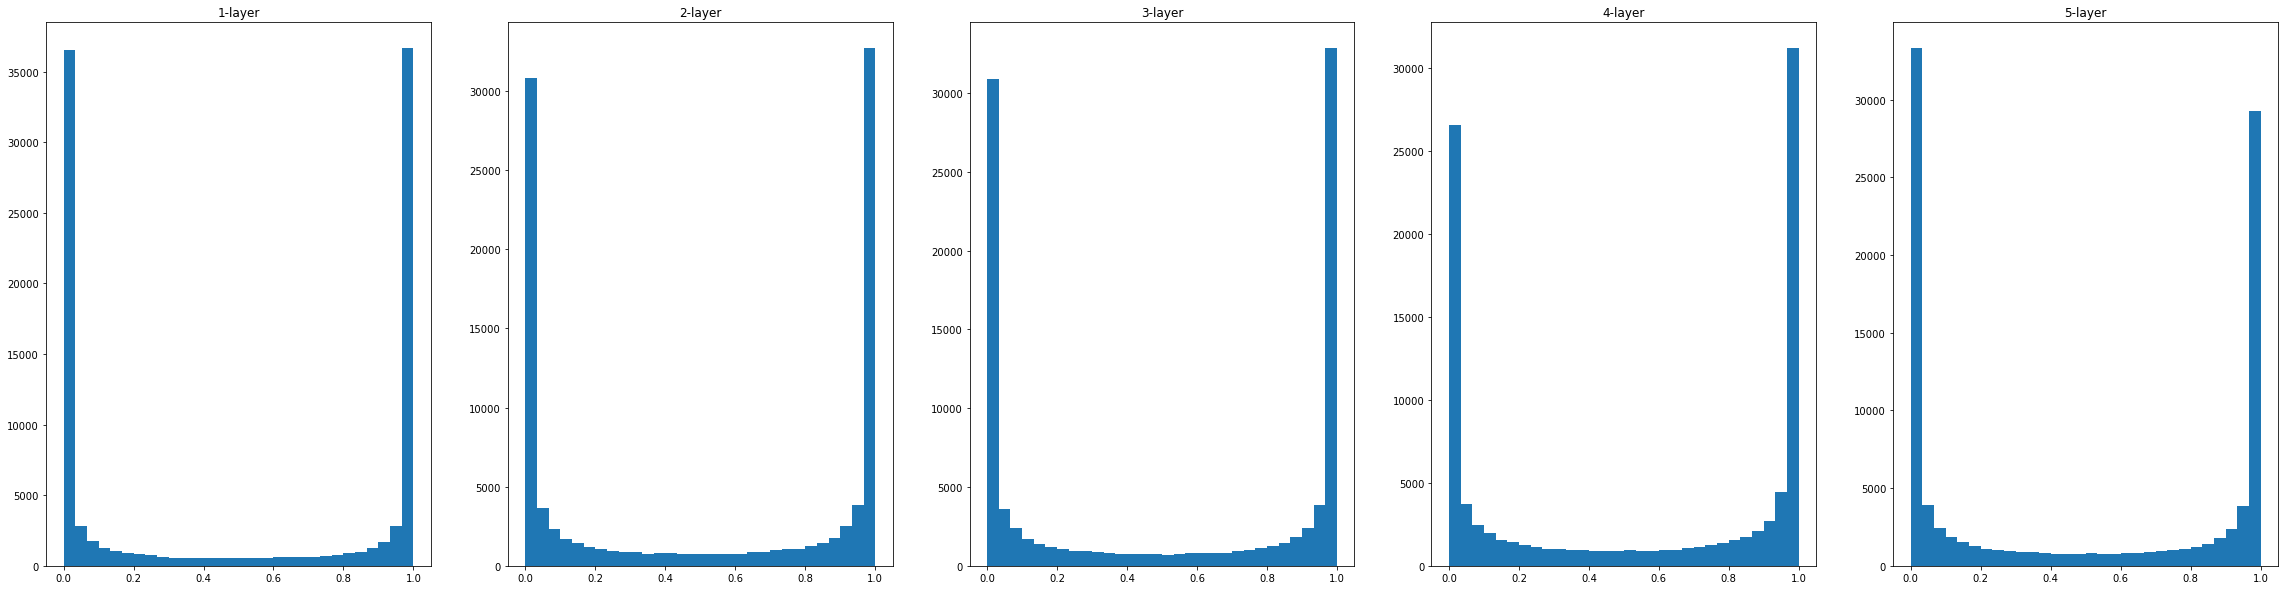

In [26]:
# 히스토그램 그리기
plt.figure(num=5, figsize=(40,10))  ##그래프 잘 안 보여서 추가함..

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

**표준편차가 0.01인 정규분포**

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과(활성화값)를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) * 0.01  # 표준편차가 0.01인 정규분포
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

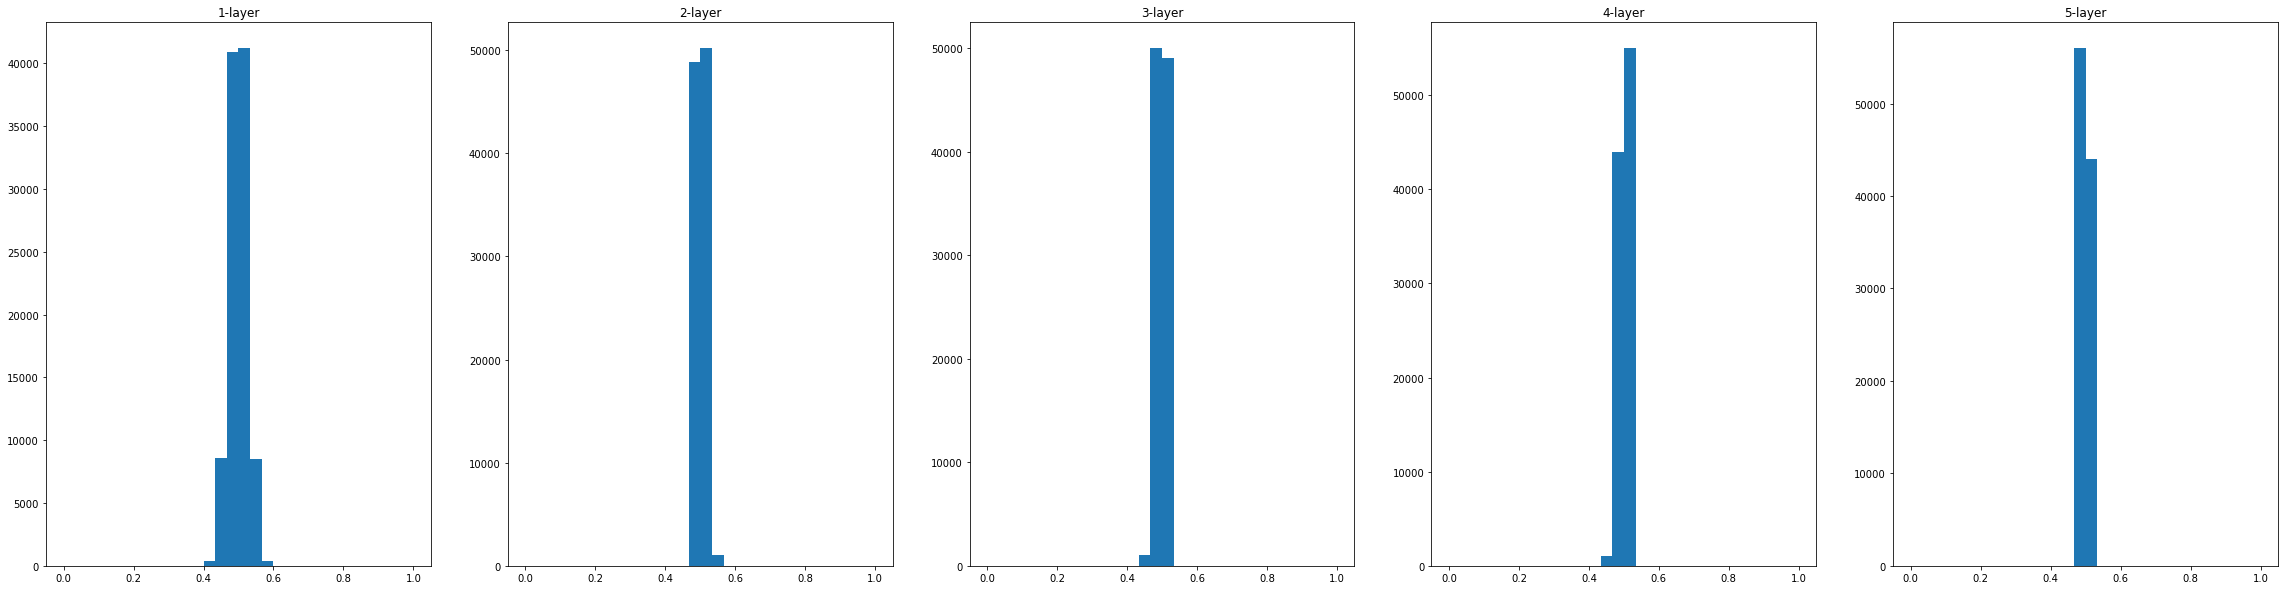

In [28]:
# 히스토그램 그리기
plt.figure(num=5, figsize=(40,10))  ##그래프 잘 안 보여서 추가함..

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

**Xavier 초깃값**

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과(활성화값)를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)  # 표준편차가 1/sqrt(n)인 정규분포
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

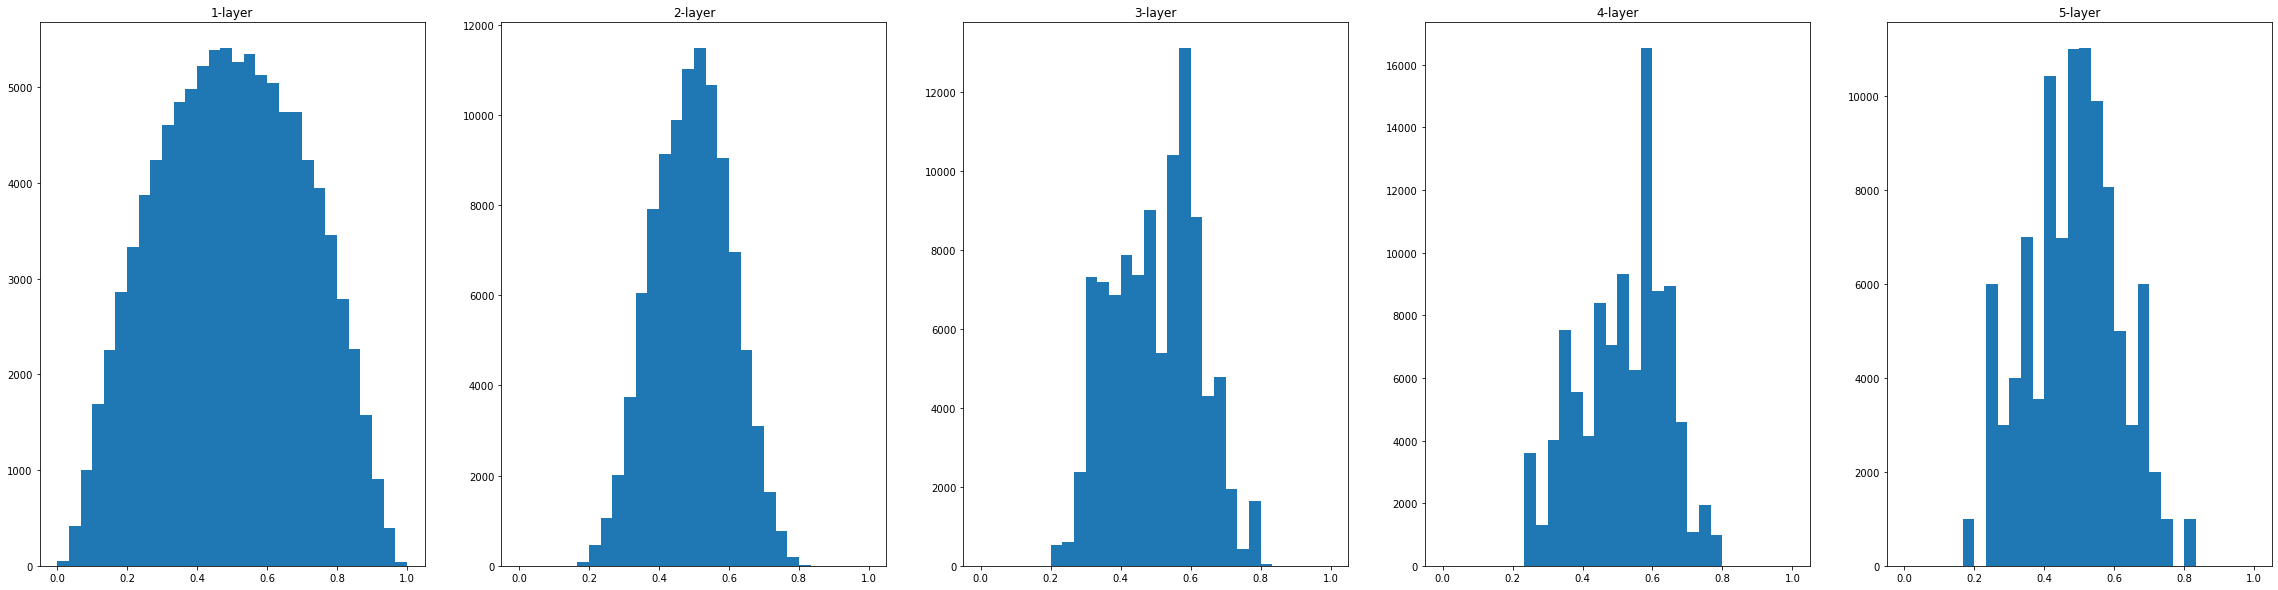

In [30]:
# 히스토그램 그리기
plt.figure(num=5, figsize=(40,10))  ##그래프 잘 안 보여서 추가함..

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

### 6.2.3 ReLU를 사용할 때의 가중치 초깃값

<img src='./img/fig 6-14.png' width=600>

### 6.2.4 MNIST 데이터셋으로 본 가중치 초깃값 비교

<img src='./img/fig 6-15.png' width=400>

## 6.3 배치 정규화
P.210

### 6.3.1 배치 정규화 알고리즘

<img src='./img/fig 6-16.png' width=500>

$$\mu_B \leftarrow \frac{1}{m} \displaystyle\sum_{i=1}^m x_i$$

$$\sigma_B^2 \leftarrow \frac{1}{m} \displaystyle\sum_{i=1}^m (x_i - \mu_B)^2$$

$$\hat{x}_i \leftarrow \frac{x_i - \mu_B}{\sqrt{\sigma_B^2+\epsilon}}$$

$$y_i \leftarrow \gamma \hat{x}_i + \beta$$

<img src='./img/fig 6-17.png' width=500>

### 6.3.2 배치 정규화의 효과

<img src='./img/fig 6-18.png' width=400>

<img src='./img/fig 6-19.png' width=600>

## 6.4 바른 학습을 위해
P.215

### 6.4.1 오버피팅

In [11]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

In [ ]:
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = SGD(lr=0.01)  # 학습률이 0.01인 SGD로 매개변수 갱신
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

<img src='./img/fig 6-20.png' width=400>

### 6.4.2 가중치 감소

<img src='./img/fig 6-21.png' width=400>

### 6.4.3 드롭아웃

<img src='./img/fig 6-22.png' width=500>

In [9]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
        
    def backward(self, dout):
        return dout * self.mask

<img src='./img/fig 6-23.png' width=700>

## 6.5 적절한 하이퍼파라미터 값 찾기
P.221

### 6.5.1 검증 데이터

In [12]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from common.util import shuffle_dataset

(x_train, t_train), (x_test, t_test) = load_mnist()

# 훈련 데이터를 뒤섞는다.
x_train, t_train, = shuffle_dataset(x_train, t_train)

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

### 6.5.2 하이퍼파라미터 최적화

- __0단계__

    하이퍼파라미터 값의 범위를 설정합니다.
    
    
- __1단계__

    설정된 범위에서 하이퍼파라미터의 값을 무작위로 추출합니다.
    

- __2단계__

    1단계에서 샘플링한 하이퍼파라미터 값을 사용하여 학습하고, 검증 데이터로 정확도를 평가합니다(단, 에폭은 작게 설정합니다).
    

- __3단계__

    1단계와 2단계를 특정 횟수(100회 등) 반복하여, 그 정확도의 결과를 보고 하아퍼파라미터의 범위를 좁힙니다.

### 6.5.3 하이퍼파라미터 최적화 구현하기

In [13]:
weight_decay = 10 ** np.random.uniform(-8, -4)
lr = 10 ** np.random.uniform(-6, -1)

<img src='./img/fig 6-24.png' width=600>